In [1]:
#import the prerequesities 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#read the datset and printing first five rows
df=pd.read_csv(r'R:\all_dataset\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#printing the shape of the datset 
df.shape

(1000, 8)

In [4]:
#use describe method to see mean,median,mode..
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
#use info method to know info() method shows some of the characteristics of the data such as Column Name, No. of non-null values of our columns, Dtype of the data, and Memory Usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#checking whelther the datset any null value or not 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#check whether dataset have duplicate values
duplicatevalue=df.duplicated()
duplicatevalue.sum()

0

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

(array([0, 1]), [Text(0, 0, 'none'), Text(1, 0, 'completed')])

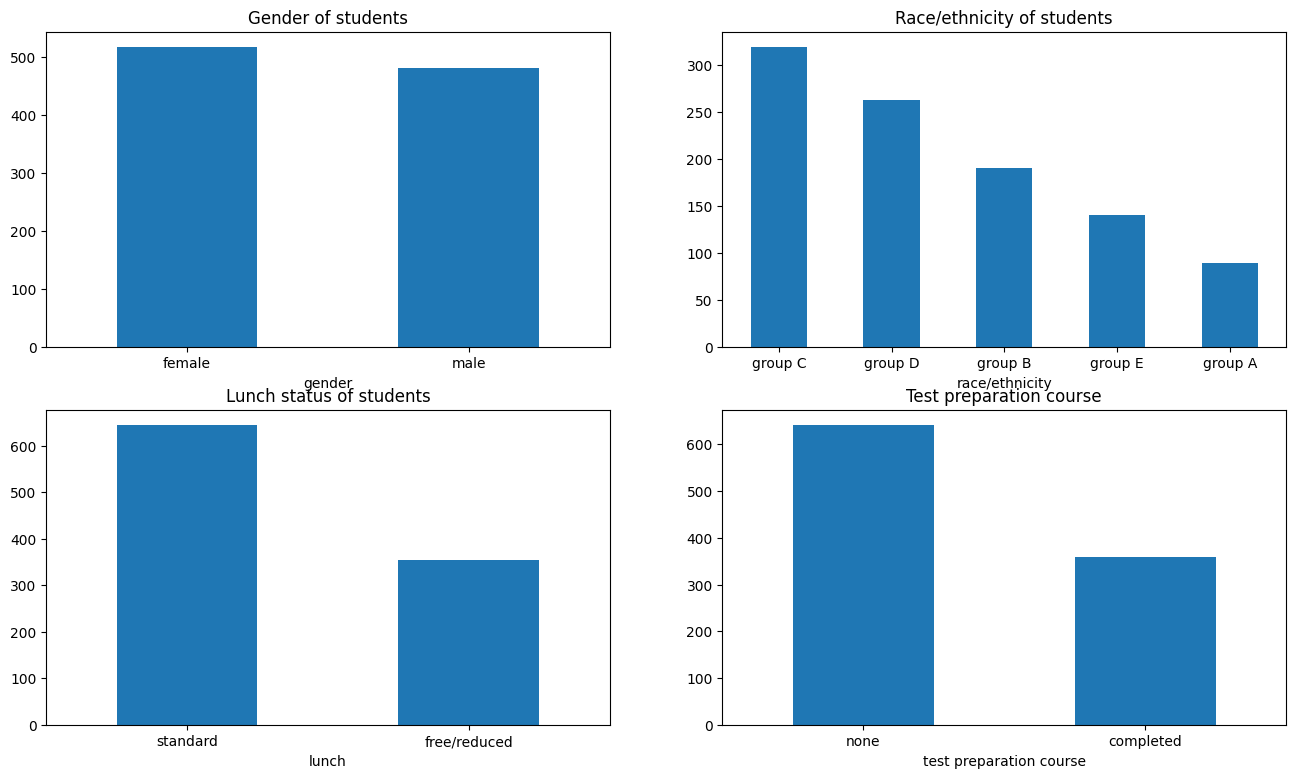

In [27]:
#Univariate Analysis.
plt.subplot(221)
df['gender'].value_counts().plot(kind='bar',title='Gender of students',figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')
plt.xticks(rotation=0)

plt.subplot(223)
df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')
plt.xticks(rotation=0)

plt.subplot(224)
df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')
plt.xticks(rotation=0)

<Axes: >

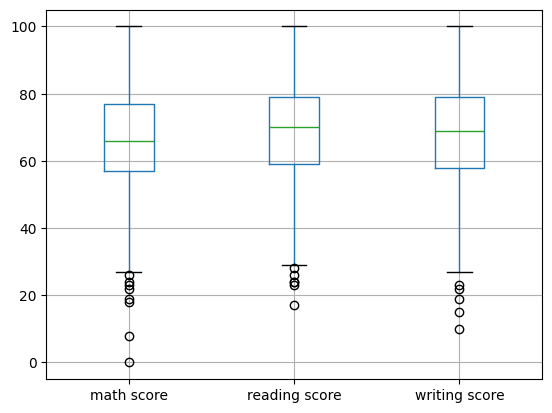

In [21]:
#ploting the dataset ot check whether outliers is present or not
df.boxplot()

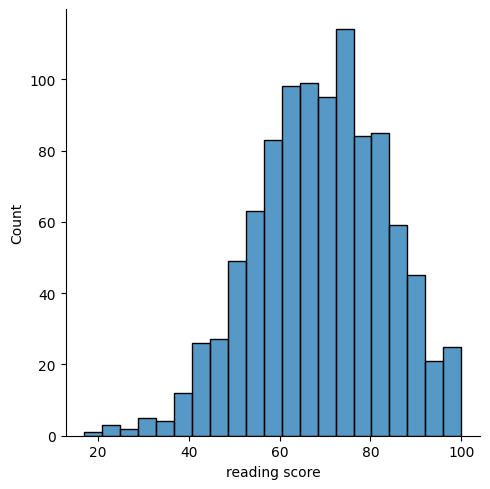

In [22]:
sns.displot(df['reading score'])

In [25]:
df2=df[['math score','reading score','writing score']]

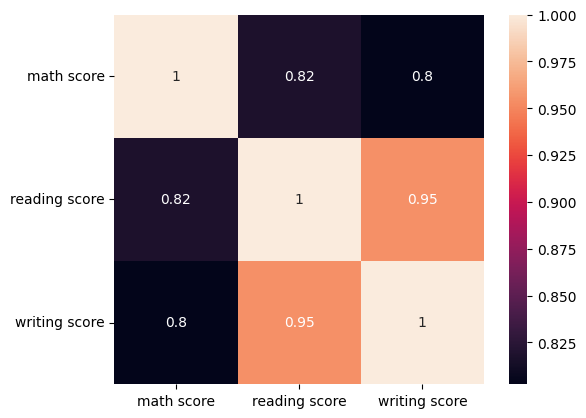

In [43]:
#ploting the correlation between the scores of the student
corr = df2.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

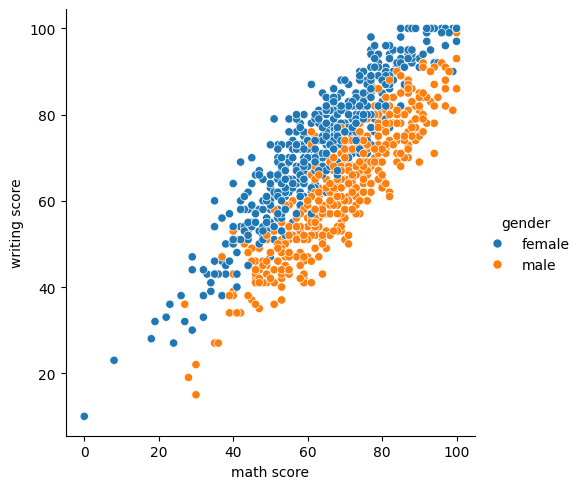

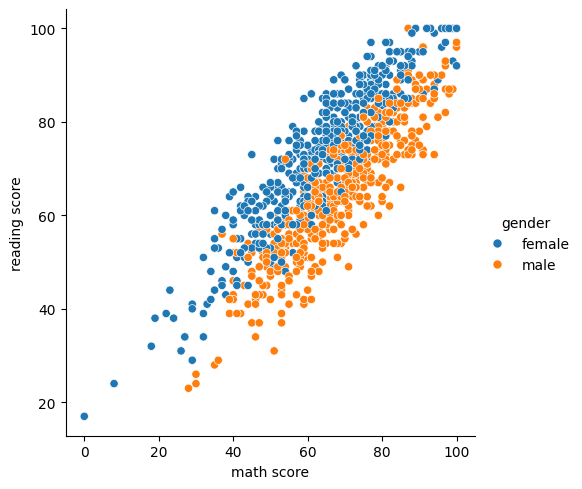

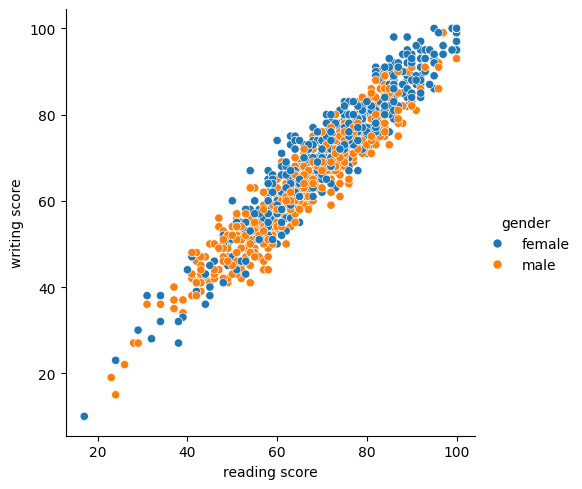

In [34]:
#now move on to bivariate analysis
sns.relplot(x='math score', y='writing score', hue='gender', data=df)
sns.relplot(x='math score', y='reading score', hue='gender', data=df)
sns.relplot(x='reading score', y='writing score', hue='gender', data=df)

<Axes: >

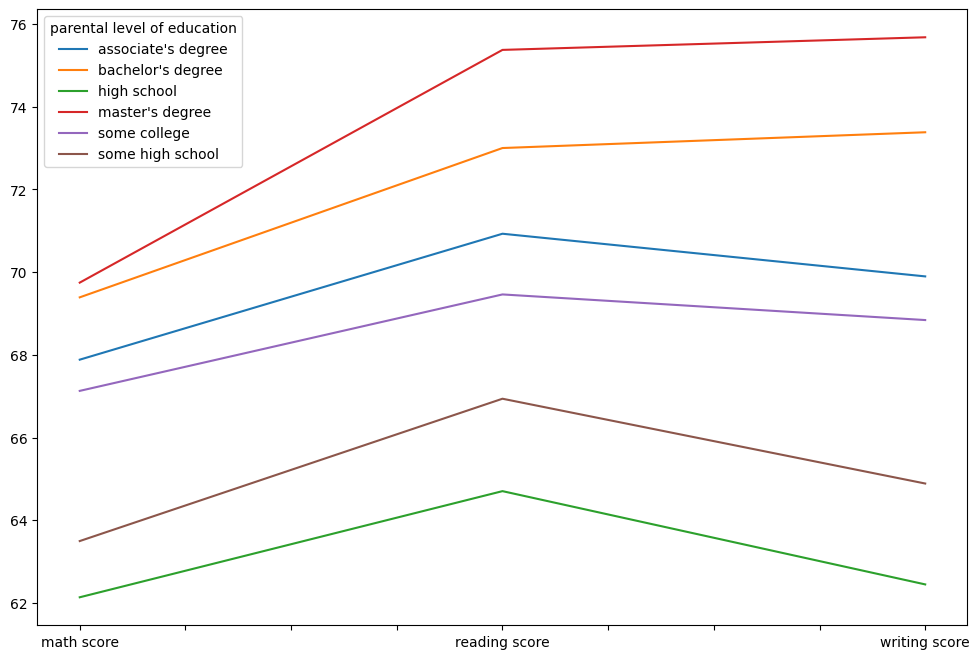

In [30]:
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

<Axes: >

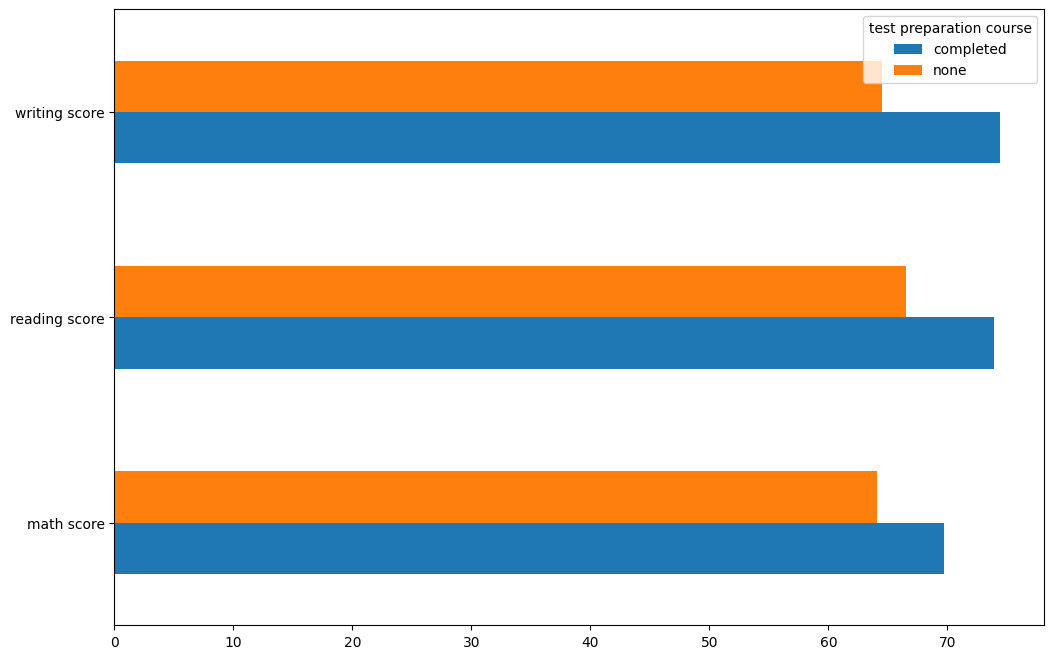

In [33]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh',figsize=(12,8))